In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_coffee_data():
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1, 2)
    X[:, 1] = X[:, 1] * 4 + 11.5  # 12-15 min is best
    X[:, 0] = X[:, 0] * (285 - 150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))

    i = 0
    for t, d in X:
        y = -3 / (260 - 175) * t + 21
        if t > 175 and t < 260 and d > 12 and d < 15 and d <= y:
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1, 1))


X, Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


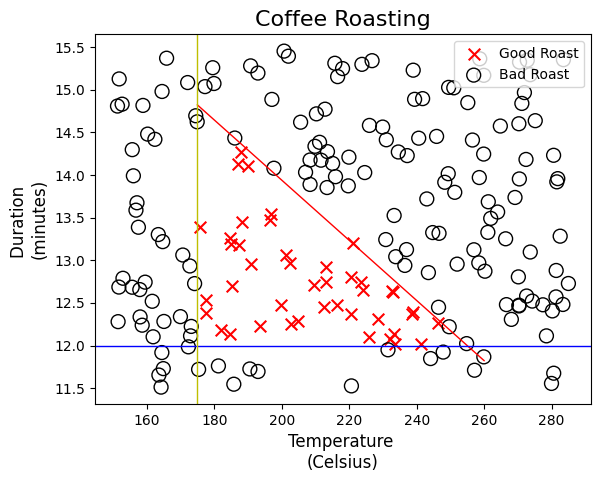

In [4]:
def plt_roast(X, Y):
    Y = Y.reshape(
        -1,
    )
    colormap = np.array(["r", "b"])
    fig, ax = plt.subplots(
        1,
        1,
    )
    ax.scatter(
        X[Y == 1, 0], X[Y == 1, 1], s=70, marker="x", c="red", label="Good Roast"
    )
    ax.scatter(
        X[Y == 0, 0],
        X[Y == 0, 1],
        s=100,
        marker="o",
        facecolors="none",
        linewidth=1,
        label="Bad Roast",
        edgecolors="black",
    )
    tr = np.linspace(175, 260, 50)
    ax.plot(tr, (-3 / 85) * tr + 21, color="r", linewidth=1)
    ax.axhline(y=12, color="b", linewidth=1)
    ax.axvline(x=175, color="y", linewidth=1)
    ax.set_title(f"Coffee Roasting", size=16)
    ax.set_xlabel("Temperature \n(Celsius)", size=12)
    ax.set_ylabel("Duration \n(minutes)", size=12)
    ax.legend(loc="upper right")
    plt.show()


plt_roast(X, Y)

### Normalize Data


In [6]:
import tensorflow as tf

print("Temperature Max, Min pre normalization: ", np.max(X[:, 0]), " ", np.min(X[:, 0]))
print("Duration    Max, Min pre normalization: ", np.max(X[:, 1]), " ", np.min(X[:, 1]))
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
X_normal = norm_l(X)
print(
    "Temperature Max, Min pre normalization: ",
    np.max(X_normal[:, 0]),
    " ",
    np.min(X_normal[:, 0]),
)
print(
    "Duration    Max, Min pre normalization: ",
    np.max(X_normal[:, 1]),
    " ",
    np.min(X_normal[:, 1]),
)

Temperature Max, Min pre normalization:  284.99434167453603   151.32372212128612
Duration    Max, Min pre normalization:  15.454206928801511   11.512747082472469
Temperature Max, Min pre normalization:  1.6597542   -1.6852185
Duration    Max, Min pre normalization:  1.7932389   -1.6996713


In [7]:
def g(z):
    return 1 / (1 + np.exp(-z))


def dence(a_in, W, b):
    neuron = W.shape[1]
    a_out = np.zeros(neuron)

    for i in range(neuron):

        z = np.dot(a_in, W[:, i]) + b[i]

        a_out[i] = g(z)

    return a_out

In [8]:
def sequential(X, W1, b1, W2, b2):
    a1 = dence(X, W1, b1)
    a2 = dence(a1, W2, b2)
    f_x = a2
    return f_x

In [31]:
def predict(X, W1, b1, W2, b2):
    n = X.shape[0]
    pred = np.zeros((n, 1))

    for i in range(n):
        f_x = sequential(X[i], W1, b1, W2, b2)
        pred[i, 0] = f_x[0]

    y_hat = np.zeros((n, 1))
    y_hat[pred >= 0.5] = 1
    return y_hat

In [33]:
W1_tmp = np.array([[-8.93, 0.29, 12.9], [-0.1, -7.32, 10.81]])
b1_tmp = np.array([-9.82, -9.28, 0.96])
W2_tmp = np.array([[-31.18], [-27.59], [-32.56]])
b2_tmp = np.array([15.41])

X_tst = np.array([[200, 13.9], [200, 17]])
X_tstn = norm_l(X_tst)
predictions = predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)
predictions

array([[1.],
       [0.]])